# Image Segmentation Using K-Nearest Neighbours

In [1]:
# Importing all the required libraries
import numpy as np
from sklearn.cluster import KMeans
import cv2
import datetime
from matplotlib import pyplot as plt
import time

In [2]:
image1 = cv2.imread("BloodImage_00000.jpg")
image2 = cv2.imread("BloodImage_00001.jpg")
image3 = cv2.imread("BloodImage_00002.jpg")
image4 = cv2.imread("BloodImage_00003.jpg")
# Testing on a sample of 4 images here
image = [image1,image2,image3,image4]
reshaped = [0,0,0,0]
# Flattening the images
for i in range(0,4):
    reshaped[i] = image[i].reshape(image[i].shape[0] * image[i].shape[1], image[i].shape[2])

In [3]:
numClusters = list(map(int,input("Enter the number of clusters for image 1,2,3 and 4 respectively: ").split(" ")))

Enter the number of clusters for image 1,2,3 and 4 respectively: 4 4 4 4


In [4]:
clustering=[0,0,0,0]
#n_init : number of times the algorithm will be run with different centroid seeds
#max_iter : maximum number of iterations
for i in range(0,4):
    kmeans = KMeans(n_clusters=numClusters[i], n_init=40, max_iter=500).fit(reshaped[i])
    clustering[i] = np.reshape(np.array(kmeans.labels_, dtype=np.uint8),
    (image[i].shape[0], image[i].shape[1]))

In [5]:
sortedLabels = [[],[],[],[]]
for i in range(0,4):
    sortedLabels[i] = sorted([n for n in range(numClusters[i])],
        key = lambda x: -np.sum(clustering[i] == x))

In [6]:
kmeansImage=[0,0,0,0]
concatImage=[[],[],[],[]]
for j in range(0,4):
    kmeansImage[j] = np.zeros(image[j].shape[:2], dtype=np.uint8)
    for i, label in enumerate(sortedLabels[j]):
        kmeansImage[j][ clustering[j] == label ] = int((255) / (numClusters[j] - 1)) * i
    concatImage[j] = np.concatenate((image[j],193 * np.ones((image[j].shape[0],
                        int(0.0625 * image[j].shape[1]), 3), dtype=np.uint8),cv2.cvtColor(kmeansImage[j],
                                    cv2.COLOR_GRAY2BGR)), axis=1)

AxesImage(54,36;334.8x217.44)


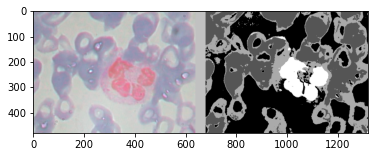

In [7]:
print(plt.imshow(concatImage[0]))

AxesImage(54,36;334.8x217.44)


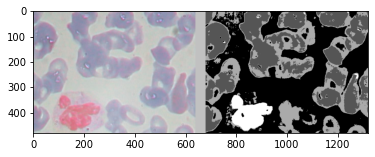

In [8]:
print(plt.imshow(concatImage[1]))

AxesImage(54,36;334.8x217.44)


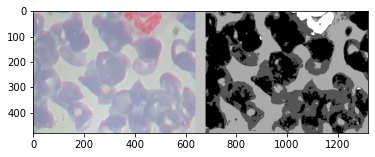

In [9]:
print(plt.imshow(concatImage[2]))

AxesImage(54,36;334.8x217.44)


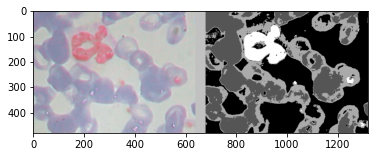

In [10]:
print(plt.imshow(concatImage[3]))